# Loan Default Dataset

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.impute import KNNImputer 
import seaborn as sns

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("/Users/joanaperdigoto/Desktop/Postgraduate in Data Analytics /Second Semester/DMML/2023/Loan_Default_Dataset.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.shape

(148670, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
df.duplicated().sum()

0

In [6]:
df['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

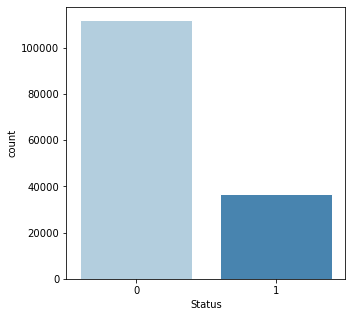

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x=df["Status"], palette = 'Blues', edgecolor = 'w')

In [8]:
NaN = df.isnull().sum()/df.shape[0]*100
NaN.round(1)

ID                            0.0
year                          0.0
loan_limit                    2.2
Gender                        0.0
approv_in_adv                 0.6
loan_type                     0.0
loan_purpose                  0.1
Credit_Worthiness             0.0
open_credit                   0.0
business_or_commercial        0.0
loan_amount                   0.0
rate_of_interest             24.5
Interest_rate_spread         24.6
Upfront_charges              26.7
term                          0.0
Neg_ammortization             0.1
interest_only                 0.0
lump_sum_payment              0.0
property_value               10.2
construction_type             0.0
occupancy_type                0.0
Secured_by                    0.0
total_units                   0.0
income                        6.2
credit_type                   0.0
Credit_Score                  0.0
co-applicant_credit_type      0.0
age                           0.1
submission_of_application     0.1
LTV           

In [9]:
import missingno as msno

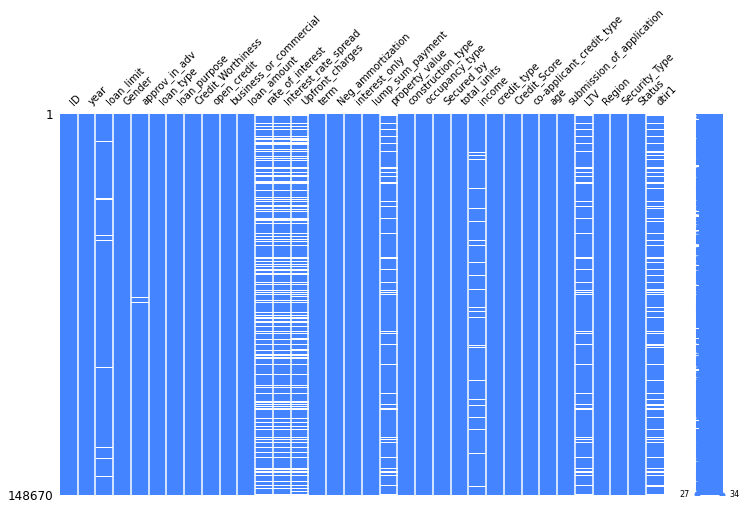

In [10]:
msno.matrix(df, figsize=(12,7), fontsize=10, color=(0.27, 0.52, 1.0));


We can see there are a lot missing values.

Checking for correlations.

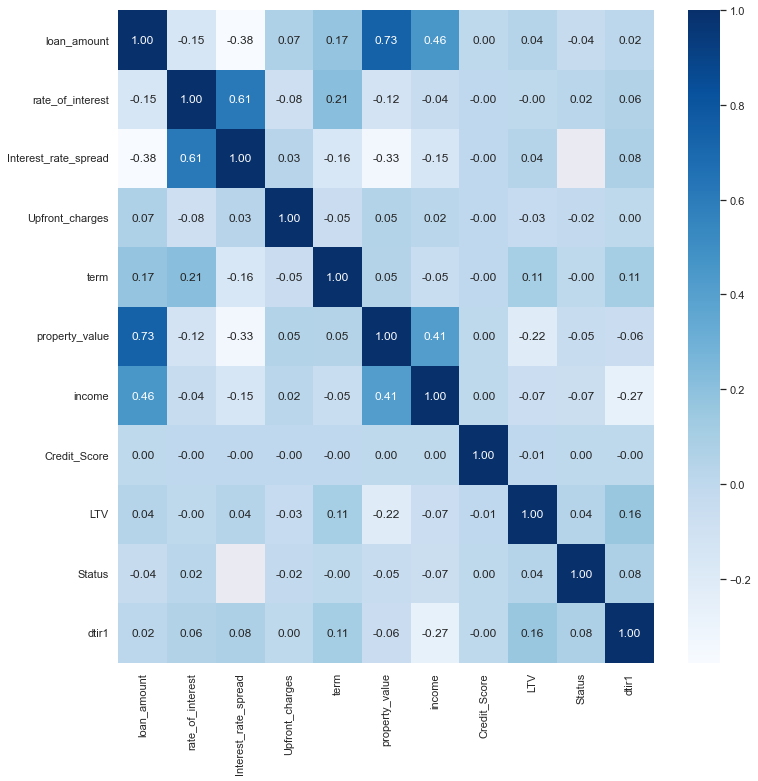

In [11]:
# sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f'); 

df_heatmap = df.drop(['ID','year'], axis=1)
sns.set (rc = {'figure.figsize':(12, 12)})
sns.heatmap(df_heatmap.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show ()


Cheking for data completeness correlations.

<AxesSubplot:>

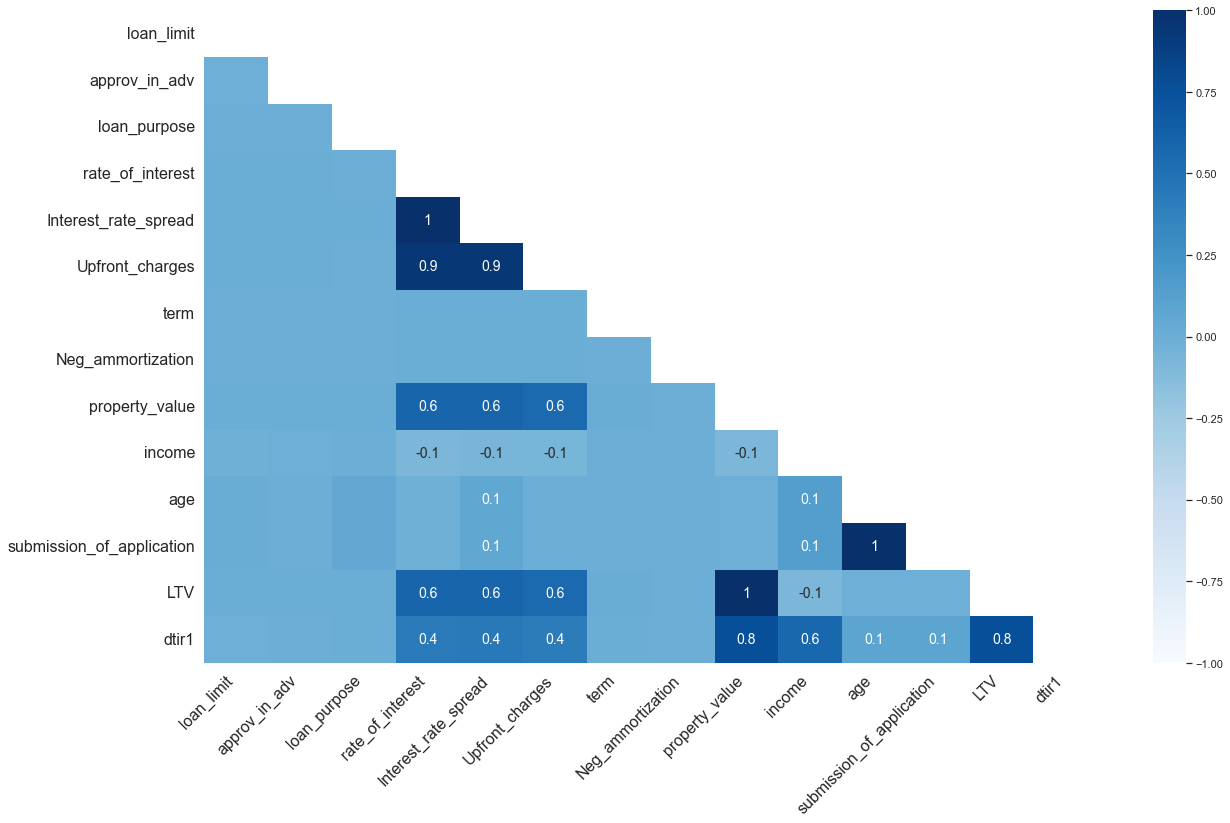

In [12]:
msno.heatmap(df, labels = True, cmap='Blues')

The missing values for "Upfroant_charges" and "rate_of_interest" are highly correlated.
Same for "dtir1" and "property_value"

There are no major correlations bewteen "Status" and the remaining variables, for which we need to handle missing data.

At first, we thought about handling the missing data by deleting it.

In [13]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [14]:
cleaned_df=df.drop(['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1'],axis=1)

In [15]:
df.shape

(148670, 34)

In [16]:
cleaned_df.shape

(148670, 20)

We have also tried to fill NaN numerical values using a KNNInputer from sklearn.

In [17]:
dtypes = pd.DataFrame(df.dtypes).reset_index()

categorical_variables = []
numerical_variables = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        categorical_variables.append(i)
    else:
        numerical_variables.append(i)

In [18]:
df_numerical = df[numerical_variables]

KNN (takes a long time - about 35 min)

In [19]:
KNN = KNNImputer(n_neighbors = 3)
KNN.fit(df_numerical)
X = KNN.fit_transform(df_numerical)


In [20]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer()
# df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

In [21]:
# imputer = SimpleImputer(strategy='most_frequent')
# df[['age']] = imputer.fit_transform(df[['age']])

Check again for NaN

In [22]:
df_numerical = pd.DataFrame(X, columns=numerical_variables)
NaN = df_numerical.isna().sum()
print(NaN)

ID                      0
year                    0
loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
Status                  0
dtir1                   0
dtype: int64


In [23]:
df_numerical.isna().sum()   

ID                      0
year                    0
loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
Status                  0
dtir1                   0
dtype: int64

Categorical Values

In [24]:
df.describe(include=['O'])

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,...,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637


We have decided to replace the null values by the top (mode - the most frequent)  of each of the categorical variables.

In [25]:
df_categorical = df[categorical_variables]

for i in df_categorical:
    mode = df[i].mode()
    mode = mode[0]
    print(mode)

# https://www.kaggle.com/code/bayesianterrapin/predicting-loan-defaults

cf
Male
nopre
type1
p3
l1
nopc
nob/c
not_neg
not_int
not_lpsm
sb
pr
home
1U
CIB
CIB
45-54
to_inst
North
direct


In [26]:
for i in categorical_variables:
    mode = df[i].mode()
    mode = mode[0]
    df_categorical[i].fillna(value=mode, inplace=True)

/var/folders/h5/x5t5__j12597qhr4pctbvbsm0000gn/T/ipykernel_7696/122874669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[i].fillna(value=mode, inplace=True)
/var/folders/h5/x5t5__j12597qhr4pctbvbsm0000gn/T/ipykernel_7696/122874669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[i].fillna(value=mode, inplace=True)
/var/folders/h5/x5t5__j12597qhr4pctbvbsm0000gn/T/ipykernel_7696/122874669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [27]:
NaN = df_categorical.isna().sum()
print(NaN)

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: int64


Concatenate categorical and numerical variable.

In [28]:
cleaned_df = pd.concat([df_numerical, df_categorical], axis=1)
cleaned_df.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,24890.0,2019.0,116500.0,4.201667,0.972767,3405.226667,360.0,118000.000000,1740.0,758.0,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,24891.0,2019.0,206500.0,3.996667,0.677800,558.893333,360.0,281333.333333,4980.0,552.0,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,24893.0,2019.0,456500.0,4.250000,0.681000,124.500000,360.0,658000.000000,11880.0,587.0,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602.0,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [29]:
NaN = cleaned_df.isna().sum()
print(NaN)

ID                           0
year                         0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
property_value               0
income                       0
Credit_Score                 0
LTV                          0
Status                       0
dtir1                        0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region  

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

ValueError: num must be 1 <= num <= 9, not 10

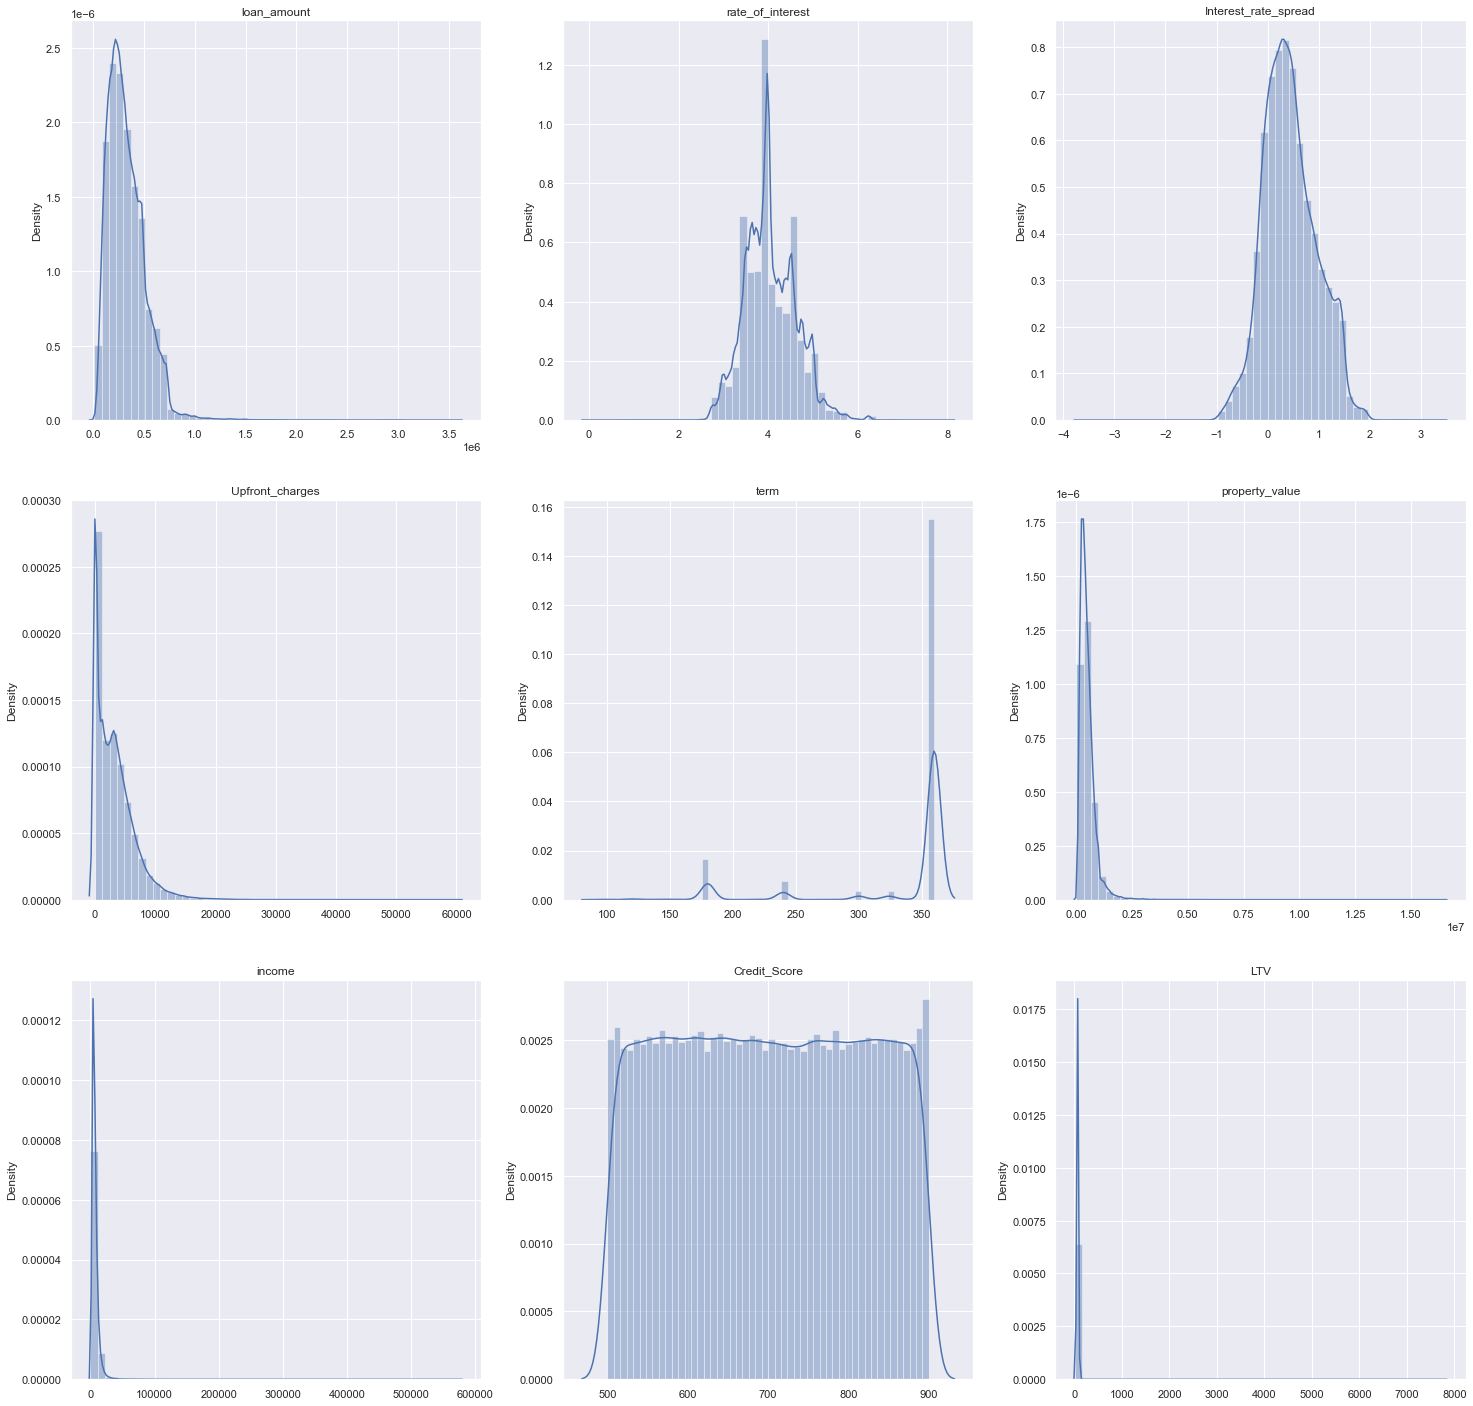

In [30]:
df_numerical = pd.DataFrame(cleaned_df[cleaned_df.select_dtypes(include=['float', 'int']).columns])
numerical_hist = df_numerical.drop(['ID','year'], axis=1)
plt.figure(figsize = (25, 25))
for i in enumerate(numerical_hist):
    plt.subplot(3, 3,i[0]+1)
    sns.distplot(df, x = df[i[1]])
    plt.title(i[1])

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amount'>

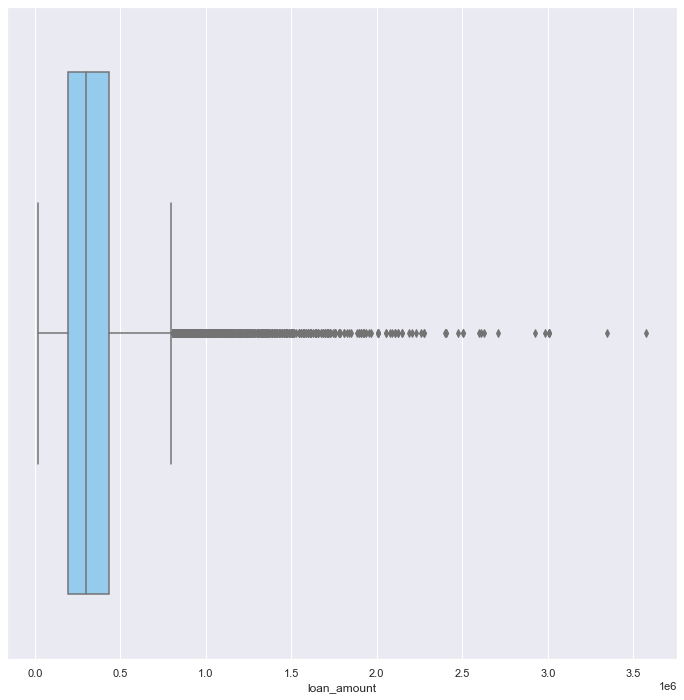

In [ ]:
sns.boxplot(cleaned_df.loan_amount, color='lightskyblue')

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Upfront_charges'>

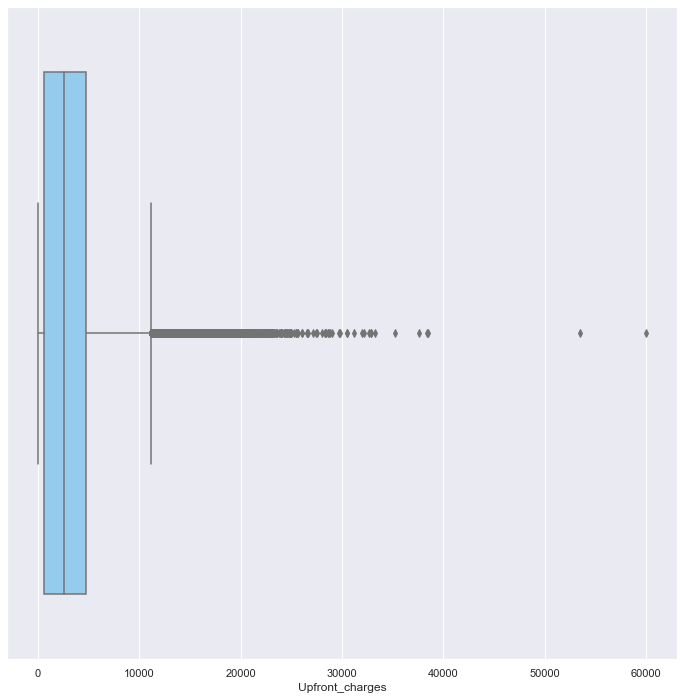

In [ ]:
sns.boxplot(cleaned_df.Upfront_charges, color='lightskyblue')

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_value'>

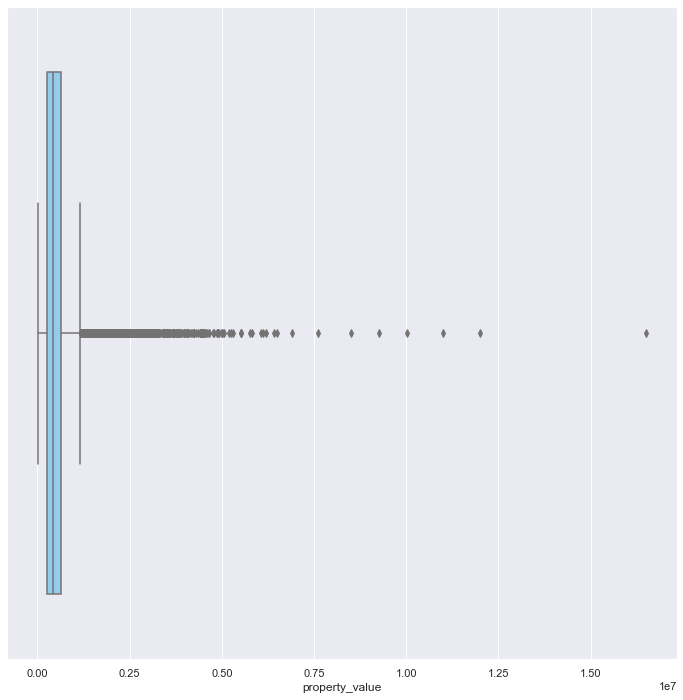

In [ ]:
sns.boxplot(cleaned_df.property_value, color='lightskyblue')

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income'>

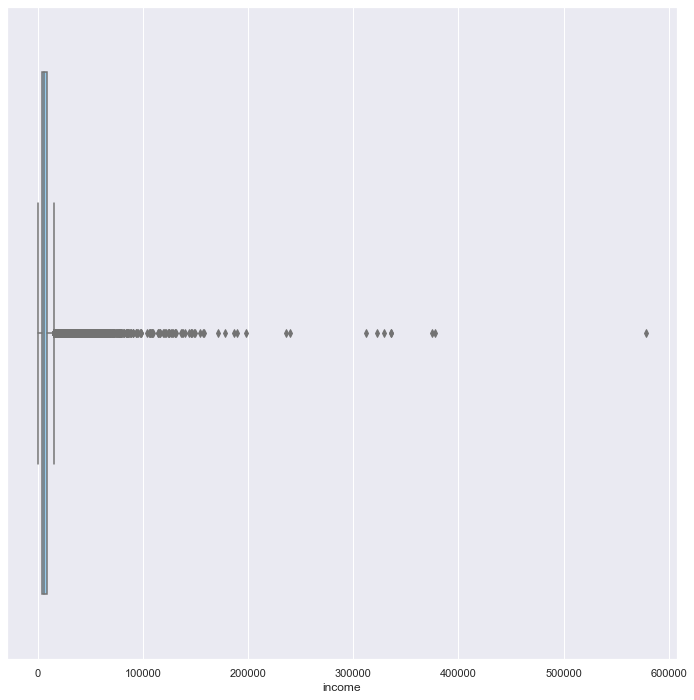

In [ ]:
sns.boxplot(cleaned_df.income, color='lightskyblue')

## Pre-processing

Encode categorical variables

In [ ]:
list_object = cleaned_df.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    cleaned_df[col] = encoder.fit_transform(cleaned_df[col].values.tolist())

cleaned_df.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,24890.0,2019.0,116500.0,4.201667,0.972767,3405.226667,360.0,118000.000000,1740.0,758.0,...,1,1,0,0,3,0,0,1,3,1
1,24891.0,2019.0,206500.0,3.996667,0.677800,558.893333,360.0,281333.333333,4980.0,552.0,...,1,1,0,0,2,1,3,1,0,1
2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,...,1,1,0,0,3,0,1,1,3,1
3,24893.0,2019.0,456500.0,4.250000,0.681000,124.500000,360.0,658000.000000,11880.0,587.0,...,1,1,0,0,3,0,2,0,0,1
4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602.0,...,1,1,0,0,1,1,0,0,0,1


## Modelling, Scoring and Valuation

In [ ]:
X = cleaned_df.drop("Status", axis=1)
Y = cleaned_df.Status
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print('The train dataset has {} data\nThe test dataset has {} data'.
      format(X_train.shape[0], X_test.shape[0]))

The train dataset has 118936 data
The test dataset has 29734 data


Logistic Regression

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
accuracy_train = LR.score(X_train_norm, y_train)
accuracy_test = accuracy_score(y_test, LR.predict(X_test_norm))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Logistic Regression Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 75.29%
Logistic Regression Accuracy: 75.62%


/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
accuracy_train = decision_tree.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, decision_tree.predict(X_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Decision Tree Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 100.00%
Decision Tree Accuracy: 93.22%


Naive Bayes

In [ ]:
nBayes = GaussianNB()
nBayes = nBayes.fit(X_train, y_train)
accuracy_train = nBayes.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, nBayes.predict(X_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Naive Bayes Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 74.37%
Naive Bayes Accuracy: 74.80%


Random Forest

In [ ]:
random_forest = RandomForestClassifier()
random_forest = random_forest.fit(X_train, y_train)
accuracy_train = random_forest.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, random_forest.predict(X_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Random Forest Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 100.00%
Random Forest Accuracy: 92.56%


SVM (not viable / takes too long)

In [ ]:
# svc = SVC()
# svc = svc.fit(X_train, y_train)
# accuracy_train = svc.score(X_train, y_train)
# accuracy_test = accuracy_score(y_test, svc.predict(X_test))
# print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
# print ("SVM Accuracy: %.2f%%" % (accuracy_test*100))

# Additional Performance metrics
Decision Tree

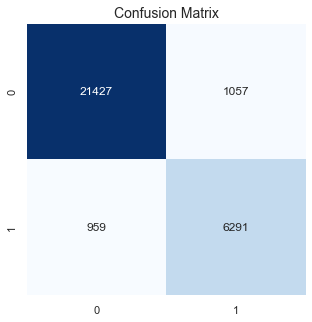

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,decision_tree.predict(X_test)), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14)

plt.show()

In [ ]:
accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
precision = precision_score(y_test, decision_tree.predict(X_test))
recall = recall_score(y_test, decision_tree.predict(X_test))
fscore = f1_score(y_test, decision_tree.predict(X_test))

print('Accuracy test data: %.2f%%' % (accuracy * 100.0))
print('Precision test data: %.2f%%' % (precision * 100.0))
print('Recall test data: %.2f%%' % (recall * 100.0))
print('F1_score test data: %.2f%%' % (fscore * 100.0))

Accuracy test data: 93.22%
Precision test data: 85.62%
Recall test data: 86.77%
F1_score test data: 86.19%


Random Forest

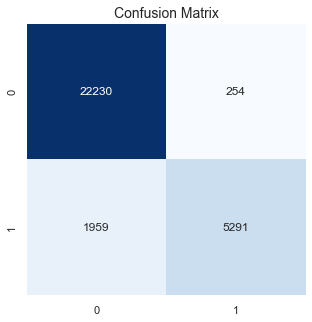

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,random_forest.predict(X_test)), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14)

plt.show()

In [ ]:
accuracy = accuracy_score(y_test, random_forest.predict(X_test))
precision = precision_score(y_test, random_forest.predict(X_test))
recall = recall_score(y_test, random_forest.predict(X_test))
fscore = f1_score(y_test, random_forest.predict(X_test))

print('Accuracy test data: %.2f%%' % (accuracy * 100.0))
print('Precision test data: %.2f%%' % (precision * 100.0))
print('Recall test data: %.2f%%' % (recall * 100.0))
print('F1_score test data: %.2f%%' % (fscore * 100.0))

Accuracy test data: 92.56%
Precision test data: 95.42%
Recall test data: 72.98%
F1_score test data: 82.70%
